In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mserr

In [2]:
path = "D:/Study/MSIT/2nd Year/DataScience_2019501007/Intro to Machine Learning/Code Camp/Linear Regression/"

In [3]:
train = path + "train.csv"
test = path + "test.csv"
trainx_df = pd.read_csv(train, index_col = 'Id')
print(trainx_df.shape)

(1460, 80)


In [4]:
trainy_df = trainx_df['SalePrice']
print(trainy_df.shape)

(1460,)


In [5]:
trainx_df.drop('SalePrice', axis = 1, inplace = True)
test_df = pd.read_csv(test, index_col = 'Id')
print(test_df.shape)

(1459, 79)


In [6]:
sample_size = len(trainx_df)
columns_with_null_values = []
for col in trainx_df.columns:
    if trainx_df[col].isnull().sum():
        columns_with_null_values.append([col, float(trainx_df[col].isnull().sum()) / float(sample_size)])
print(columns_with_null_values)

[['LotFrontage', 0.1773972602739726], ['Alley', 0.9376712328767123], ['MasVnrType', 0.005479452054794521], ['MasVnrArea', 0.005479452054794521], ['BsmtQual', 0.025342465753424658], ['BsmtCond', 0.025342465753424658], ['BsmtExposure', 0.026027397260273973], ['BsmtFinType1', 0.025342465753424658], ['BsmtFinType2', 0.026027397260273973], ['Electrical', 0.0006849315068493151], ['FireplaceQu', 0.4726027397260274], ['GarageType', 0.05547945205479452], ['GarageYrBlt', 0.05547945205479452], ['GarageFinish', 0.05547945205479452], ['GarageQual', 0.05547945205479452], ['GarageCond', 0.05547945205479452], ['PoolQC', 0.9952054794520548], ['Fence', 0.8075342465753425], ['MiscFeature', 0.963013698630137]]


In [7]:
columns_to_drop = [x for (x,y) in columns_with_null_values if y > 0.3]
print(columns_to_drop)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [8]:
trainx_df.drop(columns_to_drop, axis = 1, inplace = True)
test_df.drop(columns_to_drop, axis = 1, inplace = True)
print(len(trainx_df.columns))
print(trainx_df.shape)

74
(1460, 74)


In [9]:
categorical_columns = [col for col in trainx_df.columns if trainx_df[col].dtype == object]
# categorical_columns.append('MSSubClass')
# print(len(categorical_columns))
ordinal_columns = [col for col in trainx_df.columns if col not in categorical_columns]
# print(len(ordinal_columns))

In [10]:
dummy_row = list()
for col in trainx_df.columns:
    if col in categorical_columns:
        dummy_row.append('dummy')
    else:
        dummy_row.append("")
print(dummy_row)

['', 'dummy', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', 'dummy', '', 'dummy', '', '', '', 'dummy', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', '', 'dummy', '', 'dummy', '', 'dummy', '', 'dummy', '', '', 'dummy', 'dummy', 'dummy', '', '', '', '', '', '', '', '', '', 'dummy', 'dummy']


In [11]:
new_row = pd.DataFrame([dummy_row], columns = trainx_df.columns)
trainx_df = pd.concat([trainx_df, new_row], axis = 0, ignore_index = True)
test_df = pd.concat([test_df, new_row], axis = 0, ignore_index = True)
for col in categorical_columns:
    trainx_df[col].fillna(value = 'dummy', inplace = True)
    test_df[col].fillna(value = 'dummy', inplace = True)

In [12]:
enc = OneHotEncoder(drop = 'first', sparse = False)
enc.fit(trainx_df[categorical_columns])
trainx_enc = pd.DataFrame(enc.transform(trainx_df[categorical_columns]))
test_enc = pd.DataFrame(enc.transform(test_df[categorical_columns]))
print(trainx_df.shape)
print(test_df.shape)
trainx_enc.columns = enc.get_feature_names(categorical_columns)
test_enc.columns = enc.get_feature_names(categorical_columns)
trainx_df = pd.concat([trainx_df[ordinal_columns], trainx_enc], axis = 1, ignore_index = True)
test_df = pd.concat([test_df[ordinal_columns], test_enc], axis = 1, ignore_index = True)
print(len(trainx_df.columns))

(1461, 74)
(1460, 74)
270


In [13]:
trainx_df.drop(trainx_df.tail(1).index, inplace = True)
test_df.drop(test_df.tail(1).index, inplace = True)
print(trainx_df.shape)

(1460, 270)


In [14]:
imputer = KNNImputer(n_neighbors = 2)
imputer.fit(trainx_df)
trainx_df_filled = imputer.transform(trainx_df)
trainx_df_filled = pd.DataFrame(trainx_df_filled, columns = trainx_df.columns)
print(trainx_df_filled.isnull().sum())

0      0
1      0
2      0
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    0
Length: 270, dtype: int64


In [15]:
test_df_filled = imputer.transform(test_df)
test_df_filled = pd.DataFrame(test_df_filled, columns = test_df.columns)
test_df_filled.reset_index(drop = True, inplace = True)

In [16]:
scaler = preprocessing.StandardScaler().fit(trainx_df)
trainx_df = scaler.transform(trainx_df_filled)
test_df = scaler.transform(test_df_filled)
print(trainx_df.shape)
print(test_df.shape)

(1460, 270)
(1459, 270)


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(trainx_df, trainy_df.values.ravel(), test_size = 0.3, random_state = 42)

[2.0, 18.0, 34.0, 50.0, 66.0, 82.0, 98.0, 114.0, 130.0, 146.0] 
 [0.9329195273, 0.9218293603, 0.915995658, 0.9122221847, 0.9093837701, 0.9070589664, 0.9050541263, 0.9032664411, 0.9016354191, 0.9001226713] 
 [0.7800015394, 0.8661121273, 0.8755359306, 0.8778244769, 0.878436371, 0.8784822941, 0.8782923034, 0.8779880197, 0.8776210688, 0.877215739] 
 [403728887.5133, 470475894.3885, 505586471.7821, 528297406.0281, 545380618.571, 559372624.9062, 571438906.416, 582198224.5001, 592014653.4161, 601119240.0789] 
 [1535169885.1253, 934282129.0206, 868521946.1352, 852552255.5854, 848282401.114, 847961945.727, 849287718.3872, 851411038.1637, 853971656.4551, 856800085.7858]


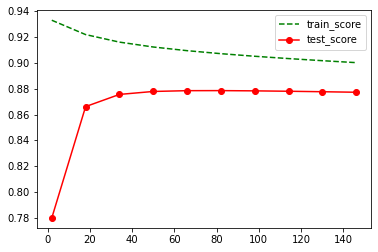

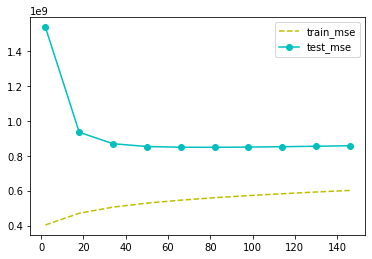

In [24]:
LRModel = LinearRegression().fit(X_train, Y_train)


score_train = []
score_test = []
mse_train = []
mse_test = []
alpha = []
alpha_start = 2
alpha_end = 146
jumps = 10

for sigma in np.linspace(alpha_start, alpha_end, jumps):
    alpha.append(sigma)
    # Ridge_model=getRidgeRegressionModel(X_train, y_train,reg_par=sigma)
    Ridge_model = Ridge(alpha = sigma,tol = 0.01).fit(X_train, Y_train)
    score_train.append(round(Ridge_model.score(X_train, Y_train), 10))
    score_test.append(round(Ridge_model.score(X_test, Y_test), 10))
    mse_train.append(round(mserr(Y_train,Ridge_model.predict(X_train)), 4))
    mse_test.append(round(mserr(Y_test,Ridge_model.predict(X_test)), 4))
print(alpha,'\n', score_train, '\n', score_test,'\n', mse_train, '\n', mse_test) 

Ridge_model = Ridge(alpha = 146,tol = 0.01).fit(X_train, Y_train)
testpred = pd.DataFrame(Ridge_model.predict(test_df))
testpred.to_csv("test_pred.csv")

plt.figure(1)
plt.plot(alpha, score_train, 'g--',label = "train_score")
plt.plot(alpha, score_test, 'r-o',label = "test_score")
plt.xlabel = 'Alpha'
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label = "train_mse")
plt.plot(alpha, mse_test, 'c-o',label = "test_mse")
plt.xlabel = 'Alpha'
plt.legend()
plt.show()

In [21]:
def predictTestx(Model, testx_df):
    testpred = pd.DataFrame(Model.predict(testx_df))
    testpred.to_csv("test_pred.csv")